<a href="https://colab.research.google.com/github/rajuiit/FinalAutism-Comparison-of-Confusion-Cross-Validation-/blob/master/FinalAutism(Comparison_of_Confusion_%26_Cross_Validation_).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [139]:
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
# Importing Classifier Modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import GradientBoostingClassifier
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import numpy as np

In [0]:
train=pd.read_csv('gdrive/My Drive/Colab Notebooks/trainfinal.csv')
test=pd.read_csv('gdrive/My Drive/Colab Notebooks/testfinal.csv');

In [142]:
train.head(5)

,ID,Gender,Age,Autism,Family_Member,Can_Play_With,Jaundise,Region,House_Area,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Q61,Q62,Q63,Q64,Q65,Result
0,1,Female,6.0,1,6,3,Yes,Urban,Medium,3,4,3,3,3,4,3,4,3,2,3.0,4,4,4.0,3.0,4,3.0,4.0,4,4,3,4,4,3,4,4,4,4,3,3,3,4,4.0,4,3.0,4,4,3.0,4,3.0,3,3,4,3,4,3,3,2,4.0,4,4.0,3,3,3,4,4.0,3,4,4,3,2,3,4,3,4,225
1,2,Female,6.0,1,6,3,Yes,Urban,Medium,3,3,4,4,2,4,2,4,3,2,3.0,4,2,4.0,3.0,4,3.0,4.0,3,4,3,4,3,3,4,4,3,4,4,3,3,4,4.0,3,3.0,3,3,4.0,4,4.0,4,3,4,4,3,3,3,3,3.0,3,4.0,4,4,3,4,3.0,4,3,4,4,4,3,4,3,4,223
2,3,Male,5.0,0,3,2,No,Urban,Small,1,1,1,1,1,1,1,1,1,1,1.0,1,1,2.0,1.0,1,1.0,1.0,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1.0,1,1.0,1,1,1.0,1,2.0,1,1,1,1,2,1,1,1,1.0,2,1.0,1,1,1,1,1.0,1,1,1,1,1,1,1,1,1,70
3,4,Male,7.0,1,3,2,Yes,Urban,Small,3,4,4,4,3,4,3,4,4,3,4.0,4,4,4.0,4.0,3,4.0,4.0,4,4,4,4,4,3,4,4,4,4,4,4,4,4,4.0,4,4.0,4,4,4.0,4,4.0,4,4,4,4,4,4,4,4,3.0,3,3.0,3,3,3,3,4.0,4,3,3,4,4,4,4,4,3,244
4,5,Male,7.0,1,3,0,Yes,Urban,Small,4,4,4,3,4,4,3,4,4,3,4.0,4,4,4.0,4.0,4,3.0,3.0,4,4,4,4,4,4,4,4,3,4,3,4,4,4,4.0,4,4.0,4,4,3.0,4,3.0,4,4,4,4,4,4,4,4,3.0,4,4.0,4,3,4,4,2.0,4,4,3,4,4,3,4,3,4,244


In [0]:
def bar_chart(feature):
    autism = train[train['Autism']==1][feature].value_counts()
    noautism = train[train['Autism']==0][feature].value_counts()
    df = pd.DataFrame([autism,noautism])
    df.index = ['Autism','No Autism']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

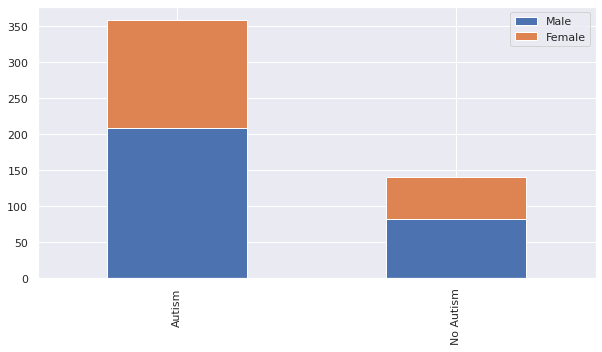

In [144]:
bar_chart('Gender')

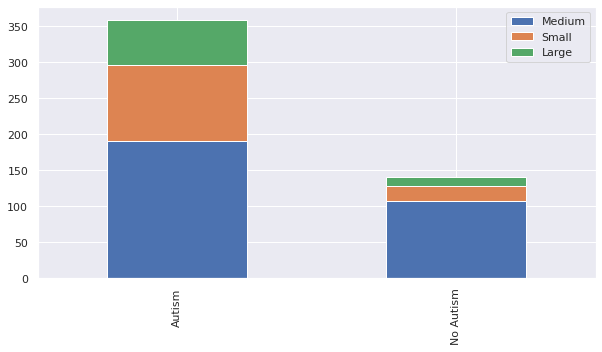

In [145]:
bar_chart('House_Area')

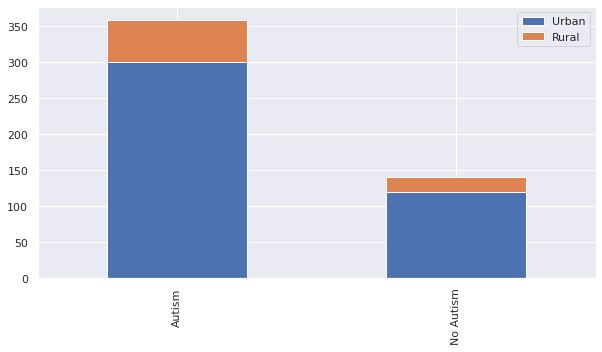

In [146]:
bar_chart('Region')

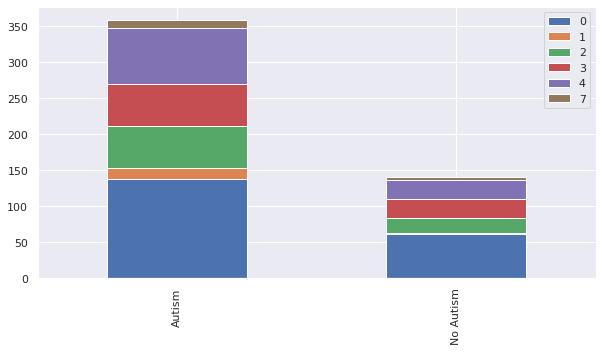

In [147]:
bar_chart('Can_Play_With')

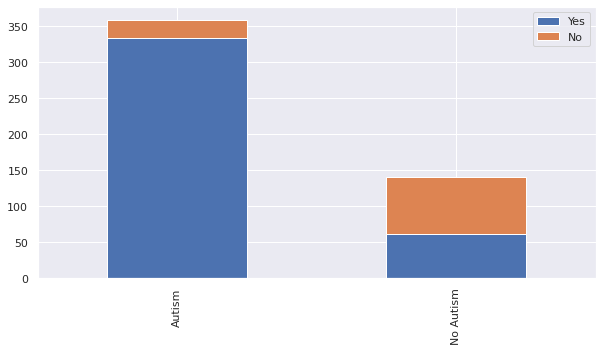

In [148]:
bar_chart('Jaundise')

In [0]:
train_test_data = [train,test]
sex_mapping = {"Male": 0, "Female": 1}
for dataset in train_test_data:
    dataset['Gender'] = dataset['Gender'].map(sex_mapping)

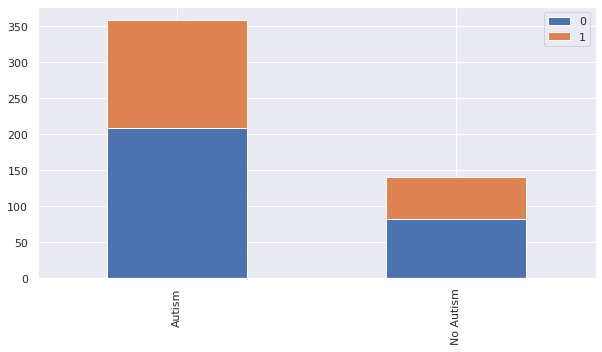

In [150]:
bar_chart('Gender')

In [0]:
train["Age"].fillna(train.groupby("Autism")["Age"].transform("median"), inplace=True)

In [152]:
train.groupby("Autism")["Age"].transform("median")

0      8.0
1      8.0
2      7.0
3      8.0
4      8.0
5      8.0
6      8.0
7      7.0
8      8.0
9      8.0
10     8.0
11     8.0
12     8.0
13     8.0
14     8.0
15     8.0
16     8.0
17     8.0
18     8.0
19     7.0
20     8.0
21     8.0
22     7.0
23     7.0
24     8.0
25     8.0
26     8.0
27     8.0
28     8.0
29     7.0
30     8.0
31     8.0
32     7.0
33     8.0
34     7.0
35     7.0
36     8.0
37     8.0
38     7.0
39     8.0
40     8.0
41     8.0
42     7.0
43     7.0
44     8.0
45     8.0
46     8.0
47     8.0
48     8.0
49     8.0
50     7.0
51     8.0
52     7.0
53     8.0
54     8.0
55     8.0
56     8.0
57     8.0
58     8.0
59     8.0
60     8.0
61     8.0
62     8.0
63     7.0
64     8.0
65     8.0
66     7.0
67     7.0
68     7.0
69     7.0
70     8.0
71     8.0
72     8.0
73     8.0
74     8.0
75     8.0
76     8.0
77     7.0
78     7.0
79     8.0
80     8.0
81     8.0
82     8.0
83     8.0
84     7.0
85     7.0
86     8.0
87     8.0
88     8.0
89     7.0
90     7.0

In [0]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 6, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 6) & (dataset['Age'] <= 12), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 12) & (dataset['Age'] <= 18), 'Age'] = 2

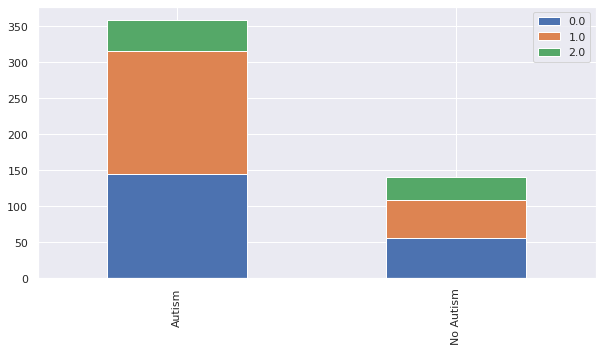

In [154]:
bar_chart('Age')

In [0]:
region_mapping = {"Urban": 0, "Rural": 1}
for dataset in train_test_data:
    dataset['Region'] = dataset['Region'].map(region_mapping)

In [0]:
house_mapping = {"Small": 0, "Medium": 1,"Large": 2}
for dataset in train_test_data:
    dataset['House_Area'] = dataset['House_Area'].map(house_mapping)

In [0]:
jaundise_mapping = {"Yes": 1, "No": 0}
for dataset in train_test_data:
    dataset['Jaundise'] = dataset['Jaundise'].map(jaundise_mapping)

In [0]:

for dataset in train_test_data:
    dataset['Q11'] = dataset['Q11'].fillna(3)

for dataset in train_test_data:
    dataset['Q14'] = dataset['Q14'].fillna(3)


for dataset in train_test_data:
    dataset['Q15'] = dataset['Q15'].fillna(3)

for dataset in train_test_data:
    dataset['Q17'] = dataset['Q17'].fillna(3)

for dataset in train_test_data:
    dataset['Q18'] = dataset['Q18'].fillna(3)

for dataset in train_test_data:
    dataset['Q33'] = dataset['Q33'].fillna(3)

for dataset in train_test_data:
    dataset['Q35'] = dataset['Q35'].fillna(3)

for dataset in train_test_data:
    dataset['Q38'] = dataset['Q38'].fillna(3)

for dataset in train_test_data:
    dataset['Q40'] = dataset['Q40'].fillna(3)

for dataset in train_test_data:
    dataset['Q49'] = dataset['Q49'].fillna(3)

for dataset in train_test_data:
    dataset['Q51'] = dataset['Q51'].fillna(3)

for dataset in train_test_data:
    dataset['Q65'] = dataset['Q65'].fillna(3)

for dataset in train_test_data:
    dataset['Q56'] = dataset['Q56'].fillna(3)

In [159]:
train = train.drop(['ID'], axis=1)
train_data = train.drop('Autism', axis=1)
target = train['Autism']
test_data = test.drop("ID", axis=1).copy()
train_data.shape, target.shape, test_data.shape

 

((500, 73), (500,), (50, 73))

In [160]:
train_data .head(500)

,Gender,Age,Family_Member,Can_Play_With,Jaundise,Region,House_Area,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Q61,Q62,Q63,Q64,Q65,Result
0,1,0.0,6,3,1,0,1,3,4,3,3,3,4,3,4,3,2,3.0,4,4,4.0,3.0,4,3.0,4.0,4,4,3,4,4,3,4,4,4,4,3,3,3,4,4.0,4,3.0,4,4,3.0,4,3.0,3,3,4,3,4,3,3,2,4.0,4,4.0,3,3,3,4,4.0,3,4,4,3,2,3,4,3,4,225
1,1,0.0,6,3,1,0,1,3,3,4,4,2,4,2,4,3,2,3.0,4,2,4.0,3.0,4,3.0,4.0,3,4,3,4,3,3,4,4,3,4,4,3,3,4,4.0,3,3.0,3,3,4.0,4,4.0,4,3,4,4,3,3,3,3,3.0,3,4.0,4,4,3,4,3.0,4,3,4,4,4,3,4,3,4,223
2,0,0.0,3,2,0,0,0,1,1,1,1,1,1,1,1,1,1,1.0,1,1,2.0,1.0,1,1.0,1.0,1,1,1,1,1,1,1,1,1,1,2,1,1,1,1.0,1,1.0,1,1,1.0,1,2.0,1,1,1,1,2,1,1,1,1.0,2,1.0,1,1,1,1,1.0,1,1,1,1,1,1,1,1,1,70
3,0,1.0,3,2,1,0,0,3,4,4,4,3,4,3,4,4,3,4.0,4,4,4.0,4.0,3,4.0,4.0,4,4,4,4,4,3,4,4,4,4,4,4,4,4,4.0,4,4.0,4,4,4.0,4,4.0,4,4,4,4,4,4,4,4,3.0,3,3.0,3,3,3,3,4.0,4,3,3,4,4,4,4,4,3,244
4,0,1.0,3,0,1,0,0,4,4,4,3,4,4,3,4,4,3,4.0,4,4,4.0,4.0,4,3.0,3.0,4,4,4,4,4,4,4,4,3,4,3,4,4,4,4.0,4,4.0,4,4,3.0,4,3.0,4,4,4,4,4,4,4,4,3.0,4,4.0,4,3,4,4,2.0,4,4,3,4,4,3,4,3,4,244
5,0,1.0,3,0,1,0,0,4,3,4,4,3,4,3,4,4,3,4.0,4,4,3.0,3.0,4,4.0,4.0,4,4,3,4,4,4,4,4,3,4,4,4,3,4,4.0,4,4.0,4,4,3.0,4,4.0,4,4,3,4,4,4,4,4,4.0,4,3.0,4,3,4,4,4.0,2,4,4,4,3,3,4,4,3,242
6,1,0.0,3,4,1,0,0,4,3,4,3,4,3,2,4,3,3,4.0,4,3,4.0,4.0,3,4.0,4.0,4,4,4,4,4,3,4,4,4,4,4,4,4,4,4.0,4,4.0,4,3,3.0,4,4.0,4,4,4,3,4,3,4,4,3.0,4,3.0,4,3,4,4,3.0,4,4,3,4,4,3,4,3,4,239
7,1,0.0,3,4,0,0,0,1,1,1,1,1,1,1,1,2,1,2.0,2,1,2.0,1.0,1,1.0,1.0,2,1,1,1,1,1,1,1,1,2,1,1,1,1,1.0,2,1.0,1,1,2.0,1,1.0,1,1,1,1,1,1,1,1,1.0,1,1.0,1,1,1,1,2.0,1,1,1,1,1,1,1,2,1,75
8,1,0.0,3,4,1,0,1,3,4,4,4,4,3,4,3,3,4,4.0,2,3,4.0,1.0,2,2.0,3.0,4,1,2,2,4,4,4,3,4,4,4,4,4,4,4.0,4,4.0,4,4,4.0,4,4.0,2,4,4,4,4,3,4,4,4.0,4,4.0,3,4,4,4,4.0,4,3,3,4,2,4,4,4,3,228
9,1,0.0,3,4,1,0,1,3,4,1,2,3,4,2,4,3,4,4.0,4,4,4.0,4.0,4,4.0,4.0,4,4,4,2,1,4,3,4,3,4,1,1,2,2,2.0,1,4.0,4,3,1.0,2,4.0,3,4,3,3,4,3,3,4,1.0,2,4.0,3,4,4,3,4.0,3,4,3,4,4,4,3,4,4,207


In [161]:
test_data.head(50)

,Gender,Age,Family_Member,Can_Play_With,Jaundise,Region,House_Area,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,Q41,Q42,Q43,Q44,Q45,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Q55,Q56,Q57,Q58,Q59,Q60,Q61,Q62,Q63,Q64,Q65,Result
0,1,0,6,3,1,0,1,4,3,3,3,4,4,3,3,3,4,4,3,3,3,4,4,3,3,3,4,4,3,3,3,4,4,3,3,3,4,4,3,3,3,4,4,3,3,3,4,4,3,3,3,4,4,3,3,3,4,4,3,3,3,4,4,3,3,3,4,4,3,3,3,4,221
1,1,0,6,3,1,0,1,3,3,4,4,3,3,3,4,4,3,3,3,4,4,3,3,3,4,4,3,1,3,4,4,3,3,3,4,4,3,3,3,4,4,3,3,3,4,4,3,3,3,4,4,3,3,3,4,4,3,3,3,4,4,3,3,3,4,1,3,3,3,4,4,3,216
2,0,0,3,2,0,0,0,2,1,1,2,1,3,1,1,2,1,2,1,1,2,1,3,1,1,2,1,3,1,1,2,1,3,1,1,2,1,1,1,1,2,1,2,1,1,2,1,3,1,1,2,1,3,1,1,2,1,3,1,1,2,1,1,1,1,2,1,2,1,1,1,1,95
3,0,0,3,2,1,0,0,1,4,4,3,3,1,4,4,3,3,1,4,4,3,3,1,4,4,3,3,1,4,4,3,3,1,4,4,3,3,1,4,4,3,3,1,4,4,3,3,1,4,4,3,3,1,4,4,3,3,1,4,4,3,4,1,4,1,4,3,1,4,4,3,3,194
4,0,0,3,0,1,0,0,3,3,4,3,4,3,3,4,3,4,3,3,4,3,4,3,3,4,3,4,3,3,4,3,4,3,3,4,3,4,3,3,4,3,4,3,3,4,3,4,3,3,4,3,4,3,3,4,3,4,3,3,4,3,4,3,3,4,3,4,3,3,4,3,3,220
5,0,1,3,0,1,0,0,4,3,3,1,4,4,3,3,4,4,4,3,3,4,4,4,3,3,1,4,4,3,3,4,4,4,3,3,4,4,1,3,3,4,4,4,3,3,4,4,4,3,3,1,4,4,3,3,4,4,4,1,3,4,4,4,1,3,4,1,4,1,3,1,4,210
6,1,2,3,4,1,0,0,2,4,2,4,3,2,4,2,4,3,2,4,2,4,3,2,4,2,4,3,2,4,2,4,3,2,4,2,4,3,2,4,2,4,3,2,4,2,4,3,2,4,2,4,3,2,4,2,4,3,2,4,2,4,3,2,4,2,4,3,2,4,2,4,3,195
7,1,2,3,4,0,0,0,1,2,1,1,2,1,2,1,1,2,1,2,1,1,2,1,2,1,1,2,1,2,1,1,2,1,2,1,1,2,1,2,1,1,2,1,2,1,1,2,1,2,1,1,2,1,2,1,1,2,1,2,1,1,2,1,2,1,1,2,1,2,1,1,2,91
8,1,1,3,4,0,0,1,4,2,3,1,1,4,2,3,1,1,4,2,3,1,1,4,2,3,1,1,4,2,3,1,1,4,2,3,1,1,4,2,3,1,1,4,2,3,1,1,4,2,3,1,1,4,2,3,1,1,4,2,3,1,1,4,2,3,1,1,4,2,3,1,1,143
9,1,1,3,4,1,0,1,2,4,2,3,4,2,4,2,3,4,2,4,2,3,4,2,4,2,3,4,2,4,2,3,4,2,4,2,3,4,2,4,2,3,4,2,4,2,3,4,2,4,2,3,4,2,4,2,3,4,2,4,2,3,4,2,4,2,4,4,1,4,2,3,4,195


In [162]:
pd.set_option('display.max_rows',None)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size=.20, random_state=0, stratify=target)
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)
print(y_test)

X_train:  (400, 73)
X_test:  (100, 73)
y_train:  (400,)
y_test:  (100,)
499    0
491    1
480    1
114    1
31     1
108    1
289    0
250    1
330    1
292    0
300    1
173    0
285    1
319    0
398    1
313    1
359    1
482    0
24     1
206    1
399    1
172    0
498    1
38     0
142    0
230    1
166    1
144    1
351    1
4      1
373    1
55     1
294    1
93     1
30     1
297    1
15     1
255    1
406    1
110    1
154    1
459    1
382    1
315    1
240    0
270    1
248    1
325    1
316    0
438    1
44     1
415    1
78     0
131    1
391    1
18     1
458    1
411    1
473    0
429    0
128    1
171    1
191    1
367    0
161    1
291    0
280    0
177    1
57     1
151    1
347    1
194    1
298    1
460    1
223    1
117    1
260    1
422    0
92     0
267    0
253    0
136    0
448    1
54     1
209    1
309    1
426    0
488    0
13     1
375    1
139    0
84     0
254    0
153    1
360    1
376    1
216    0
282    1
361    1
455    1
Name: Autism, dtype: int64


In [163]:
#Decision Tree Classifier : Model Evaluation using Confusion Matrix
#model fil & train
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

#Confusion Matrix & Measurement
print("DecisionTreeClassifier: ")
print("Confustion Matrix: ")
print(confusion_matrix(y_test, y_pred))
print("Acuracy: ", accuracy_score(y_test, y_pred)*100)
print("Classification Report: ")
print(classification_report(y_test, y_pred))

y_pred_prob = dt.predict_proba(X_test)[:,1]
print("AUC for DTC:", roc_auc_score(y_test, y_pred_prob)*100)


print("Average Precision Score:", average_precision_score(y_test, y_pred_prob)*100 )


DecisionTreeClassifier: 
Confustion Matrix: 
[[24  4]
 [ 4 68]]
Acuracy:  92.0
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        28
           1       0.94      0.94      0.94        72

    accuracy                           0.92       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.92      0.92      0.92       100

AUC for DTC: 90.07936507936508
Average Precision Score: 93.19753086419753


In [164]:

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
#Decision Tree Classifier : Model Evaluation using Cross Validation

print("Decision Tree Evaluation using Cross Validation:")
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print("Score All:", score)
print("Accuracy:", round(np.mean(score)*100, 2))

# calculate cross-validated AUC for DTC
from sklearn.model_selection import cross_val_score
print("AUC: ", cross_val_score(clf, train_data, target, cv=10, scoring='roc_auc').mean()*100)

#F-1 Score

clf.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = clf.predict(X_test)
print("F-1 Score:", fbeta_score(y_test, predictions_test, average='binary', beta=0.5)*100)


Decision Tree Evaluation using Cross Validation:
Score All: [0.94 0.94 0.98 0.9  0.96 0.96 0.96 0.96 0.98 0.9 ]
Accuracy: 94.8
AUC:  94.45238095238095
F-1 Score: 94.78021978021978


In [165]:

#Multinomial Naive Bayes

nb = MultinomialNB()
nb.fit(X_train, y_train)
y_m_pred = nb.predict(X_test)

#Confusion Matrix & Measurement
print("Multinomial Naive Bayes: ")
print("Confustion Matrix: ")
print(confusion_matrix(y_test, y_m_pred))
print("Acuracy: ", accuracy_score(y_test, y_m_pred)*100)
print("Classification Report: ",classification_report(y_test, y_m_pred))

y_pred_prob = dt.predict_proba(X_test)[:,1]
print("AUC for MultinomialNB:", roc_auc_score(y_test, y_pred_prob)*100)


print("Average Precision Score:", average_precision_score(y_test, y_pred_prob)*100 )


Multinomial Naive Bayes: 
Confustion Matrix: 
[[21  7]
 [ 3 69]]
Acuracy:  90.0
Classification Report:                precision    recall  f1-score   support

           0       0.88      0.75      0.81        28
           1       0.91      0.96      0.93        72

    accuracy                           0.90       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.90      0.90      0.90       100

AUC for MultinomialNB: 90.07936507936508
Average Precision Score: 93.19753086419753


In [166]:
#Multinomial Naive Bayes : Model Evaluation using Cross Validation

print("Multinomial Naive Bayes Evaluation using Cross Validation:")
clfMNB = MultinomialNB()
scoring = 'accuracy'
score = cross_val_score(clfMNB, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print("Score All:", score)
print("Accuracy:", round(np.mean(score)*100, 2))

# calculate cross-validated AUC for DTC
from sklearn.model_selection import cross_val_score
print("AUC: ", cross_val_score(clfMNB, train_data, target, cv=10, scoring='roc_auc').mean()*100)

#F-1 Score

clfMNB.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = clfMNB.predict(X_test)
print("F-1 Score:", fbeta_score(y_test, predictions_test, average='binary', beta=0.5)*100)


Multinomial Naive Bayes Evaluation using Cross Validation:
Score All: [0.86 0.9  0.94 0.88 0.92 0.96 0.94 0.98 0.96 0.94]
Accuracy: 92.8
AUC:  95.72380952380952
F-1 Score: 91.75531914893618


In [167]:
#RandomForestClassifier

rf = RandomForestClassifier(n_estimators=13)
rf.fit(X_train, y_train)
y_random_pred = rf.predict(X_test)

#Confusion Matrix & Measurement
print("RandomForestClassifier: ")
print("Confustion Matrix: ")
print(confusion_matrix(y_test, y_random_pred))
print("Acuracy: ", accuracy_score(y_test, y_random_pred)*100)
print("Classification Report: ",classification_report(y_test, y_random_pred))

y_pred_prob = dt.predict_proba(X_test)[:,1]
print("AUC for RandomForestClassifier:", roc_auc_score(y_test, y_pred_prob)*100)


print("Average Precision Score:", average_precision_score(y_test, y_pred_prob)*100 )

RandomForestClassifier: 
Confustion Matrix: 
[[24  4]
 [ 2 70]]
Acuracy:  94.0
Classification Report:                precision    recall  f1-score   support

           0       0.92      0.86      0.89        28
           1       0.95      0.97      0.96        72

    accuracy                           0.94       100
   macro avg       0.93      0.91      0.92       100
weighted avg       0.94      0.94      0.94       100

AUC for RandomForestClassifier: 90.07936507936508
Average Precision Score: 93.19753086419753


In [168]:
#RandomForestClassifier Evaluation using Cross Validation:

print("RandomForestClassifier Evaluation using Cross Validation:")
clfRF = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clfRF, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print("Score All:", score)
print("Accuracy:", round(np.mean(score)*100, 2))

# calculate cross-validated AUC for DTC
from sklearn.model_selection import cross_val_score
print("AUC: ", cross_val_score(clfRF, train_data, target, cv=10, scoring='roc_auc').mean()*100)

#F-1 Score

clfRF.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = clfRF.predict(X_test)
print("F-1 Score:", fbeta_score(y_test, predictions_test, average='binary', beta=0.5)*100)


RandomForestClassifier Evaluation using Cross Validation:
Score All: [0.94 0.96 0.98 0.92 0.96 0.98 0.96 0.96 0.98 0.92]
Accuracy: 95.6
AUC:  96.40833333333333
F-1 Score: 95.74468085106382


In [169]:
#SVM

sv = SVC(gamma='auto',probability=True)
sv.fit(X_train, y_train)
y_svc_pred = sv.predict(X_test)

#Confusion Matrix & Measurement
print("SVMClassifier: ")
print("Confustion Matrix: ")
print(confusion_matrix(y_test, y_svc_pred))
print("Acuracy: ", accuracy_score(y_test, y_svc_pred)*100)
print("Classification Report: ",classification_report(y_test, y_svc_pred))

y_pred_prob = dt.predict_proba(X_test)[:,1]
print("AUC for SVMClassifier:", roc_auc_score(y_test, y_pred_prob)*100)


print("Average Precision Score:", average_precision_score(y_test, y_pred_prob)*100 )

SVMClassifier: 
Confustion Matrix: 
[[24  4]
 [ 0 72]]
Acuracy:  96.0
Classification Report:                precision    recall  f1-score   support

           0       1.00      0.86      0.92        28
           1       0.95      1.00      0.97        72

    accuracy                           0.96       100
   macro avg       0.97      0.93      0.95       100
weighted avg       0.96      0.96      0.96       100

AUC for SVMClassifier: 90.07936507936508
Average Precision Score: 93.19753086419753


In [170]:
print("SVMClassifier Evaluation using Cross Validation:")
clfSVM = SVC(gamma='auto')
scoring = 'accuracy'
score = cross_val_score(clfSVM, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print("Score All:", score)
print("Accuracy:", round(np.mean(score)*100, 2))

# calculate cross-validated AUC for DTC
from sklearn.model_selection import cross_val_score
print("AUC: ", cross_val_score(clfSVM, train_data, target, cv=10, scoring='roc_auc').mean()*100)

#F-1 Score

clfSVM.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = clfSVM.predict(X_test)
print("F-1 Score:", fbeta_score(y_test, predictions_test, average='binary', beta=0.5)*100)

SVMClassifier Evaluation using Cross Validation:
Score All: [0.96 0.96 1.   0.94 0.98 1.   0.98 0.98 0.98 0.98]
Accuracy: 97.6
AUC:  96.43650793650794
F-1 Score: 95.74468085106382


In [171]:
#GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_g_pred = gnb.predict(X_test)

#Confusion Matrix & Measurement
print("GaussianNBClassifier: ")
print("Confustion Matrix: ")
print(confusion_matrix(y_test, y_g_pred))
print("Acuracy: ", accuracy_score(y_test, y_g_pred)*100)
print("Classification Report: ",classification_report(y_test, y_g_pred))

y_pred_prob = dt.predict_proba(X_test)[:,1]
print("AUC for GaussianNBClassifier:", roc_auc_score(y_test, y_pred_prob)*100)


print("Average Precision Score:", average_precision_score(y_test, y_pred_prob)*100 )

GaussianNBClassifier: 
Confustion Matrix: 
[[24  4]
 [ 0 72]]
Acuracy:  96.0
Classification Report:                precision    recall  f1-score   support

           0       1.00      0.86      0.92        28
           1       0.95      1.00      0.97        72

    accuracy                           0.96       100
   macro avg       0.97      0.93      0.95       100
weighted avg       0.96      0.96      0.96       100

AUC for GaussianNBClassifier: 90.07936507936508
Average Precision Score: 93.19753086419753


In [172]:
print("GaussianNBClassifier Evaluation using Cross Validation:")
clfGNB = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clfGNB, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print("Score All:", score)
print("Accuracy:", round(np.mean(score)*100, 2))

# calculate cross-validated AUC for DTC
from sklearn.model_selection import cross_val_score
print("AUC: ", cross_val_score(clfGNB, train_data, target, cv=10, scoring='roc_auc').mean()*100)

#F-1 Score

clfGNB.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = clfGNB.predict(X_test)
print("F-1 Score:", fbeta_score(y_test, predictions_test, average='binary', beta=0.5)*100)

GaussianNBClassifier Evaluation using Cross Validation:
Score All: [0.96 0.96 1.   0.94 0.98 1.   0.98 0.98 0.98 0.98]
Accuracy: 97.6
AUC:  96.30753968253968
F-1 Score: 95.74468085106382


In [173]:
#AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100, random_state=0)
ada.fit(X_train, y_train)
y_ada_pred = ada.predict(X_test)

#Confusion Matrix & Measurement
print("AdaBoostClassifier: ")
print("Confustion Matrix: ")
print(confusion_matrix(y_test, y_ada_pred))
print("Acuracy: ", accuracy_score(y_test, y_ada_pred)*100)
print("Classification Report: ")

print(classification_report(y_test, y_ada_pred))

y_pred_prob = dt.predict_proba(X_test)[:,1]
print("AUC for AdaBoostClassifier:", roc_auc_score(y_test, y_pred_prob)*100)


print("Average Precision Score:", average_precision_score(y_test, y_pred_prob)*100 )

AdaBoostClassifier: 
Confustion Matrix: 
[[23  5]
 [ 3 69]]
Acuracy:  92.0
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        28
           1       0.93      0.96      0.95        72

    accuracy                           0.92       100
   macro avg       0.91      0.89      0.90       100
weighted avg       0.92      0.92      0.92       100

AUC for AdaBoostClassifier: 90.07936507936508
Average Precision Score: 93.19753086419753


In [174]:
print("AdaBoostClassifier Evaluation using Cross Validation:")
clfADA = AdaBoostClassifier(n_estimators=100, random_state=0)
scoring = 'accuracy'
score = cross_val_score(clfADA, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print("Score All:", score)
print("Accuracy:", round(np.mean(score)*100, 2))

# calculate cross-validated AUC for DTC
from sklearn.model_selection import cross_val_score
print("AUC: ", cross_val_score(clfADA, train_data, target, cv=10, scoring='roc_auc').mean()*100)

#F-1 Score

clfADA.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = clfADA.predict(X_test)
print("F-1 Score:", fbeta_score(y_test, predictions_test, average='binary', beta=0.5)*100)

AdaBoostClassifier Evaluation using Cross Validation:
Score All: [0.94 0.94 1.   0.94 0.96 0.94 0.96 0.98 0.96 0.94]
Accuracy: 95.6
AUC:  95.27380952380952
F-1 Score: 93.75


In [175]:
#MLPClassifier

ml = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
ml.fit(X_train, y_train)
y_ml_pred = ml.predict(X_test)

#Confusion Matrix & Measurement
print("MLPClassifier: ")
print("Confustion Matrix: ")
print(confusion_matrix(y_test, y_ml_pred))
print("Acuracy: ", accuracy_score(y_test, y_ml_pred)*100)
print("Classification Report: ")

print(classification_report(y_test, y_ml_pred))

y_pred_prob = dt.predict_proba(X_test)[:,1]
print("AUC for MLPClassifier:", roc_auc_score(y_test, y_pred_prob)*100)


print("Average Precision Score:", average_precision_score(y_test, y_pred_prob)*100 )

MLPClassifier: 
Confustion Matrix: 
[[ 0 28]
 [ 0 72]]
Acuracy:  72.0
Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        28
           1       0.72      1.00      0.84        72

    accuracy                           0.72       100
   macro avg       0.36      0.50      0.42       100
weighted avg       0.52      0.72      0.60       100

AUC for MLPClassifier: 90.07936507936508
Average Precision Score: 93.19753086419753


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [176]:

print("MLPClassifier Evaluation using Cross Validation:")
clfMLP = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
scoring = 'accuracy'
score = cross_val_score(clfMLP, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print("Score All:", score)
print("Accuracy:", round(np.mean(score)*100, 2))

# calculate cross-validated AUC for DTC
from sklearn.model_selection import cross_val_score
print("AUC: ", cross_val_score(clfMLP, train_data, target, cv=10, scoring='roc_auc').mean()*100)

#F-1 Score

clfMLP.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = clfMLP.predict(X_test)
print("F-1 Score:", fbeta_score(y_test, predictions_test, average='binary', beta=0.5)*100)

MLPClassifier Evaluation using Cross Validation:
Score All: [0.72 0.66 0.8  0.68 0.78 0.7  0.68 0.66 0.74 0.76]
Accuracy: 71.8
AUC:  50.0
F-1 Score: 76.27118644067797


In [177]:
print("#####################")

#LogisticRegression

logRegression=LogisticRegression()
logRegression.fit(X_train,y_train)
y_predictionLogistic=logRegression.predict(X_test)

#Confusion Matrix & Measurement
print("LogisticRegression: ")
print("Confustion Matrix: ")
print(confusion_matrix(y_test, y_predictionLogistic))
print("Acuracy: ", accuracy_score(y_test, y_predictionLogistic)*100)
print("Classification Report: ")

print(classification_report(y_test, y_predictionLogistic))

y_pred_prob = dt.predict_proba(X_test)[:,1]
print("AUC for LogisticRegression:", roc_auc_score(y_test, y_pred_prob)*100)


print("Average Precision Score:", average_precision_score(y_test, y_pred_prob)*100 )

#####################
LogisticRegression: 
Confustion Matrix: 
[[23  5]
 [ 3 69]]
Acuracy:  92.0
Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.82      0.85        28
           1       0.93      0.96      0.95        72

    accuracy                           0.92       100
   macro avg       0.91      0.89      0.90       100
weighted avg       0.92      0.92      0.92       100

AUC for LogisticRegression: 90.07936507936508
Average Precision Score: 93.19753086419753


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [178]:
from sklearn import model_selection
from sklearn.model_selection import KFold
kfold = model_selection.KFold(n_splits=10, random_state=100)
print("LogisticRegression Evaluation using Cross Validation:")
clfLR = LogisticRegression(solver='lbfgs')
scoring = 'accuracy'
score = model_selection.cross_val_score(clfLR, train_data, target, cv=kfold)
print("Score All:", score)
print("Accuracy:", round(np.mean(score)*100, 2))

# calculate cross-validated AUC for DTC
from sklearn.model_selection import cross_val_score
print("AUC: ", cross_val_score(clfLR, train_data, target, cv=kfold, scoring='roc_auc').mean()*100)

#F-1 Score

clfLR.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = clfLR.predict(X_test)
print("F-1 Score:", fbeta_score(y_test, predictions_test, average='binary', beta=0.5)*100)


LogisticRegression Evaluation using Cross Validation:


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

Score All: [0.98 0.94 0.94 0.98 0.94 0.94 0.96 0.92 0.96 0.94]
Accuracy: 95.0


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


AUC:  96.94995778703209
F-1 Score: 93.75


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [179]:

#KNNClassification

KNNClassification = KNeighborsClassifier(n_neighbors=4)
KNNClassification.fit(X_train,y_train)
y_predictionKNN=KNNClassification.predict(X_test)


#Confusion Matrix & Measurement
print("KNNClassification: ")
print("Confustion Matrix: ")
print(confusion_matrix(y_test, y_predictionLogistic))
print("Acuracy: ", accuracy_score(y_test, y_predictionKNN)*100)
print("Classification Report: ")

print(classification_report(y_test, y_predictionKNN))

y_pred_prob = dt.predict_proba(X_test)[:,1]
print("AUC for KNNClassification:", roc_auc_score(y_test, y_pred_prob)*100)


print("Average Precision Score:", average_precision_score(y_test, y_pred_prob)*100 )

KNNClassification: 
Confustion Matrix: 
[[23  5]
 [ 3 69]]
Acuracy:  96.0
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        28
           1       0.95      1.00      0.97        72

    accuracy                           0.96       100
   macro avg       0.97      0.93      0.95       100
weighted avg       0.96      0.96      0.96       100

AUC for KNNClassification: 90.07936507936508
Average Precision Score: 93.19753086419753


In [180]:
print("KNNClassification Evaluation using Cross Validation:")
clfKNN = KNeighborsClassifier(n_neighbors=20)
scoring = 'accuracy'
score = cross_val_score(clfKNN, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print("Score All:", score)
print("Accuracy:", round(np.mean(score)*100, 2))

# calculate cross-validated AUC for DTC
from sklearn.model_selection import cross_val_score
print("AUC: ", cross_val_score(clfKNN, train_data, target, cv=10, scoring='roc_auc').mean()*100)

#F-1 Score

clfKNN.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = clfKNN.predict(X_test)
print("F-1 Score:", fbeta_score(y_test, predictions_test, average='binary', beta=0.5)*100)

KNNClassification Evaluation using Cross Validation:
Score All: [0.96 0.96 1.   0.94 0.98 1.   0.98 0.98 0.98 0.98]
Accuracy: 97.6
AUC:  96.40992063492064
F-1 Score: 95.74468085106382


In [181]:
from sklearn.ensemble import GradientBoostingClassifier
# Step 6: Fit a Gradient Boosting model, " compared to "Decision Tree model, accuracy go up by 10%

#GradientBoostingClassifier

gbt = GradientBoostingClassifier(n_estimators=100)
gbt.fit(X_train, y_train)
y_pred_gbt = gbt.predict(X_test)


#Confusion Matrix & Measurement
print("GradientBoostingClassifier: ")
print("Confustion Matrix: ")
print(confusion_matrix(y_test, y_pred_gbt))
print("Acuracy: ", accuracy_score(y_test, y_pred_gbt)*100)
print("Classification Report: ")

print(classification_report(y_test, y_pred_gbt))

y_pred_prob = dt.predict_proba(X_test)[:,1]
print("AUC for GradientBoostingClassifier:", roc_auc_score(y_test, y_pred_prob)*100)


print("Average Precision Score:", average_precision_score(y_test, y_pred_prob)*100 )

GradientBoostingClassifier: 
Confustion Matrix: 
[[24  4]
 [ 3 69]]
Acuracy:  93.0
Classification Report: 
              precision    recall  f1-score   support

           0       0.89      0.86      0.87        28
           1       0.95      0.96      0.95        72

    accuracy                           0.93       100
   macro avg       0.92      0.91      0.91       100
weighted avg       0.93      0.93      0.93       100

AUC for GradientBoostingClassifier: 90.07936507936508
Average Precision Score: 93.19753086419753


In [182]:
print("GradientBoostingClassifier Evaluation using Cross Validation:")
clfGBT = GradientBoostingClassifier(n_estimators=100)
scoring = 'accuracy'
score = cross_val_score(clfGBT, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print("Score All:", score)
print("Accuracy:", round(np.mean(score)*100, 2))

# calculate cross-validated AUC for DTC
from sklearn.model_selection import cross_val_score
print("AUC: ", cross_val_score(clfGBT, train_data, target, cv=10, scoring='roc_auc').mean()*100)

#F-1 Score

clfGBT.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = clfGBT.predict(X_test)
print("F-1 Score:", fbeta_score(y_test, predictions_test, average='binary', beta=0.5)*100)

GradientBoostingClassifier Evaluation using Cross Validation:
Score All: [0.94 0.96 0.98 0.94 0.94 0.96 0.98 0.98 0.98 0.94]
Accuracy: 96.0
AUC:  95.48968253968253
F-1 Score: 94.78021978021978


In [0]:
##Building the Function for AUC validation
from sklearn.preprocessing import LabelBinarizer
def multiclass_roc_auc_score(y_test,y_pred,average="macro"):
    lb=LabelBinarizer()
    lb.fit(y_test)
    y_test=lb.transform(y_test)
    y_pred=lb.transform(y_pred)
    return  metrics.roc_auc_score(y_test,y_pred,average=average)
##Building the Function for AUC validation ends here

In [184]:
## Voting Algo Start
from sklearn import metrics
print("#####################")
from sklearn.ensemble import VotingClassifier
Voting_Classification1 = VotingClassifier(estimators=[('descit',dt),('multinomial',nb), ('random', rf),('sv',sv),('ada',ada),('mlp',ml),('knn', KNNClassification), ('Gradient', gbt)],voting='hard',weights=[2,1,1,3,1,2,1,0])
Voting_Classification1.fit(X_train,y_train)

y_predictionVoting1=Voting_Classification1.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(y_test, y_predictionVoting1)*100)

print(metrics.confusion_matrix(y_test,y_predictionVoting1))

aucVoting1=multiclass_roc_auc_score(y_test,y_predictionVoting1,average="macro")
print("Are under Curve for Voting: ", aucVoting1*100)

print("Report for Voting: ")
print(metrics.classification_report(y_test,y_predictionVoting1))

print("#####################")

#####################
Accuracy:  96.0
[[24  4]
 [ 0 72]]
Are under Curve for Voting:  92.85714285714286
Report for Voting: 
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        28
           1       0.95      1.00      0.97        72

    accuracy                           0.96       100
   macro avg       0.97      0.93      0.95       100
weighted avg       0.96      0.96      0.96       100

#####################


In [185]:
## Voting Algo Start
from sklearn import metrics
print("#####################")
from sklearn.ensemble import VotingClassifier
Voting_Classification = VotingClassifier(estimators=[('descit',dt),('multinomial',nb), ('random', rf),('sv',sv),('gn',gnb),('ada',ada),('mlp',ml),('knn', KNNClassification), ('Gradient', gbt)],voting='soft',flatten_transform=True)
Voting_Classification.fit(X_train,y_train)

y_predictionVoting=Voting_Classification.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(y_test, y_predictionVoting)*100)

print(metrics.confusion_matrix(y_test,y_predictionVoting))

aucVoting=multiclass_roc_auc_score(y_test,y_predictionVoting,average="macro")
print("Are under Curve for Voting: ", aucVoting*100)

print("Report for Voting: ")
print(metrics.classification_report(y_test,y_predictionVoting))

print("#####################")

#####################
Accuracy:  96.0
[[24  4]
 [ 0 72]]
Are under Curve for Voting:  92.85714285714286
Report for Voting: 
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        28
           1       0.95      1.00      0.97        72

    accuracy                           0.96       100
   macro avg       0.97      0.93      0.95       100
weighted avg       0.96      0.96      0.96       100

#####################


In [0]:
y_pred_prob_vot = Voting_Classification.predict_proba(X_test)[:,1]

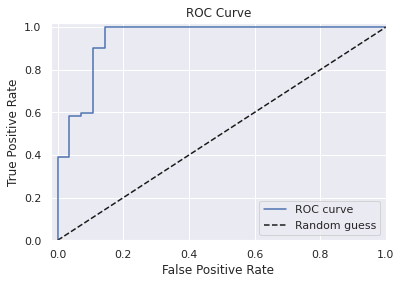

In [187]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_vot)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [188]:

## Voting Algo Start
from sklearn import metrics
print("#####################")
from sklearn.ensemble import VotingClassifier
Voting_Classification = VotingClassifier(estimators=[('descit',clf),('multinomial',clfMNB), ('random', clfRF),('sv',clfSVM),('ada',clfADA),('mlp',clfMLP),('knn', clfKNN), ('Gradient', clfGBT)],weights=[2,1,3,3,1,2,1,0],flatten_transform=True)
Voting_Classification.fit(X_train,y_train)

y_predictionVoting=Voting_Classification.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(y_test, y_predictionVoting)*100)

print(metrics.confusion_matrix(y_test,y_predictionVoting))

aucVoting=multiclass_roc_auc_score(y_test,y_predictionVoting,average="macro")
print("Are under Curve for Voting: ", aucVoting*100)

print("Report for Voting: ")
print(metrics.classification_report(y_test,y_predictionVoting))

print("#####################")

#####################
Accuracy:  96.0
[[24  4]
 [ 0 72]]
Are under Curve for Voting:  92.85714285714286
Report for Voting: 
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        28
           1       0.95      1.00      0.97        72

    accuracy                           0.96       100
   macro avg       0.97      0.93      0.95       100
weighted avg       0.96      0.96      0.96       100

#####################


In [189]:
## Voting Algo Start
from sklearn import metrics
print("#####################")
from sklearn.ensemble import VotingClassifier
clfVT = VotingClassifier(estimators=[('descit',clf),('multinomial',clfMNB), ('random', clfRF),('sv',clfSVM),('ada',clfADA),('mlp',clfMLP),('knn', clfKNN), ('Gradient', clfGBT)],weights=[1,2,3,4,6,7,4,8],flatten_transform=True)
scoring = 'accuracy'
score = cross_val_score(clfVT, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print("Score All:", score)
print("Accuracy:", round(np.mean(score)*100, 2))

# calculate cross-validated AUC for DTC
#from sklearn.model_selection import cross_val_score
#print("AUC: ", cross_val_score(clfVT, train_data, target, cv=10, scoring='roc_auc').mean()*100)



print("#####################")

#####################
Score All: [0.94 0.96 1.   0.94 0.96 0.98 0.98 0.98 0.98 0.98]
Accuracy: 97.0
#####################


In [190]:
from mlxtend.classifier import EnsembleVoteClassifier

eclf1 = EnsembleVoteClassifier(clfs=[dt, nb, rf, sv ,gnb, ada, ml, KNNClassification, gbt], weights=[1,1,1,1,1,1,1,1,1])

labels = ['Decission Tree Classification', 'MultinomialNB', 'Random Forest', 'Sipport Vector Machine','GaisianNB','ADaboost','MLP','KNN', 'Gradient','Ensemble']
for clf, label in zip([dt, nb, rf, sv ,gnb, ada, ml,KNNClassification, gbt, eclf1], labels):
    scores = model_selection.cross_val_score(clf,train_data, target,cv=5,scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
    % (scores.mean(), scores.std(), label))

Accuracy: 0.95 (+/- 0.00) [Decission Tree Classification]
Accuracy: 0.93 (+/- 0.01) [MultinomialNB]
Accuracy: 0.97 (+/- 0.01) [Random Forest]
Accuracy: 0.98 (+/- 0.01) [Sipport Vector Machine]
Accuracy: 0.98 (+/- 0.01) [GaisianNB]
Accuracy: 0.95 (+/- 0.02) [ADaboost]
Accuracy: 0.72 (+/- 0.00) [MLP]
Accuracy: 0.97 (+/- 0.01) [KNN]
Accuracy: 0.96 (+/- 0.00) [Gradient]
Accuracy: 0.98 (+/- 0.01) [Ensemble]


In [191]:
from mlxtend.classifier import EnsembleVoteClassifier

eclf2 = EnsembleVoteClassifier(clfs=[clf, clfMNB, clfRF, clfSVM ,clfGNB, clfADA, clfMLP, clfKNN, clfGBT], weights=[1,1,1,1,1,1,1,1,1])

labels = ['Decission Tree Classification', 'MultinomialNB', 'Random Forest', 'Support Vector Machine','GaisianNB','ADaboost','MLP','KNN', 'Gradient','Ensemble']
for clf, label in zip([clf, clfMNB, clfRF, clfSVM ,clfGNB, clfADA, clfMLP, clfKNN, clfGBT, eclf2], labels):
    scores = model_selection.cross_val_score(clf,train_data, target,cv=5,scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"
    % (scores.mean(), scores.std(), label))

Accuracy: 0.98 (+/- 0.01) [Decission Tree Classification]
Accuracy: 0.93 (+/- 0.01) [MultinomialNB]
Accuracy: 0.96 (+/- 0.02) [Random Forest]
Accuracy: 0.98 (+/- 0.01) [Support Vector Machine]
Accuracy: 0.98 (+/- 0.01) [GaisianNB]
Accuracy: 0.95 (+/- 0.02) [ADaboost]
Accuracy: 0.72 (+/- 0.00) [MLP]
Accuracy: 0.98 (+/- 0.01) [KNN]
Accuracy: 0.96 (+/- 0.01) [Gradient]
Accuracy: 0.98 (+/- 0.01) [Ensemble]


In [192]:
from mlxtend.classifier import EnsembleVoteClassifier
eclf3 = EnsembleVoteClassifier(clfs=[clf, clfMNB, clfRF, clfSVM ,clfGNB, clfADA, clfMLP, clfKNN, clfGBT], weights=[1,1,1,1,1,1,1,1,1])
eclf3.fit(train_data,target)

y_predictionVoting=eclf3.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(y_test, y_predictionVoting)*100)

print(metrics.confusion_matrix(y_test,y_predictionVoting))

aucVoting=multiclass_roc_auc_score(y_test,y_predictionVoting,average="macro")
print("Are under Curve for Voting: ", aucVoting*100)

print("Report for Voting: ")
print(metrics.classification_report(y_test,y_predictionVoting))

print("#####################")

Accuracy:  96.0
[[24  4]
 [ 0 72]]
Are under Curve for Voting:  92.85714285714286
Report for Voting: 
              precision    recall  f1-score   support

           0       1.00      0.86      0.92        28
           1       0.95      1.00      0.97        72

    accuracy                           0.96       100
   macro avg       0.97      0.93      0.95       100
weighted avg       0.96      0.96      0.96       100

#####################


In [193]:
print("EsembleVoteClassifier Evaluation using Cross Validation:")
from mlxtend.classifier import EnsembleVoteClassifier
eclf4 = EnsembleVoteClassifier(clfs=[clf, clfMNB, clfRF, clfSVM ,clfGNB, clfADA, clfMLP, clfKNN, clfGBT], weights=[1,1,1,1,1,1,1,1,1])
scoring = 'accuracy'
score = cross_val_score(eclf4, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print("Score All:", score)
print("Accuracy:", round(np.mean(score)*100, 2))

# calculate cross-validated AUC for DTC
#from sklearn.model_selection import cross_val_score
#print("AUC: ", cross_val_score(eclf4, train_data, target, cv=10, scoring='roc_auc').mean()*100)

#F-1 Score

#eclf4.fit(X_train, y_train)
#from sklearn.metrics import fbeta_score
#predictions_test = eclf4.predict(X_test)
#print("F-1 Score:", fbeta_score(y_test, predictions_test, average='binary', beta=0.5)*100)

EsembleVoteClassifier Evaluation using Cross Validation:
Score All: [0.96 0.96 1.   0.94 0.98 1.   0.98 0.98 0.98 0.98]
Accuracy: 97.6
